## About Dataset
### Abstract
The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

### Information
The data is related to direct marketing campaign direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

In [97]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,cohen_kappa_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve

from imblearn.over_sampling import ADASYN, SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [98]:
data = pd.read_csv('bank-additional-full.csv',sep=';',na_values='unknown')

In [99]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [100]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

## Basic Exploration

In [101]:
print('Rows',data.shape[0])
print('Columns',data.shape[1])

Rows 41188
Columns 21


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [103]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [104]:
data.describe(include='object').T

,count,unique,top,freq
job,40858,11,admin.,10422
marital,41108,3,married,24928
education,39457,7,university.degree,12168
default,32591,2,no,32588
housing,40198,2,yes,21576
loan,40198,2,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


## Univariate and bivariate analysis

In [105]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [106]:
num_cols = ['age','duration','campaign','emp.var.rate','cons.price.idx',
            'cons.conf.idx','euribor3m','nr.employed']
cat_cols = []
for i in data.columns:
    if i not in num_cols:
        cat_cols.append(i)

In [107]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'pdays',
 'previous',
 'poutcome',
 'y']

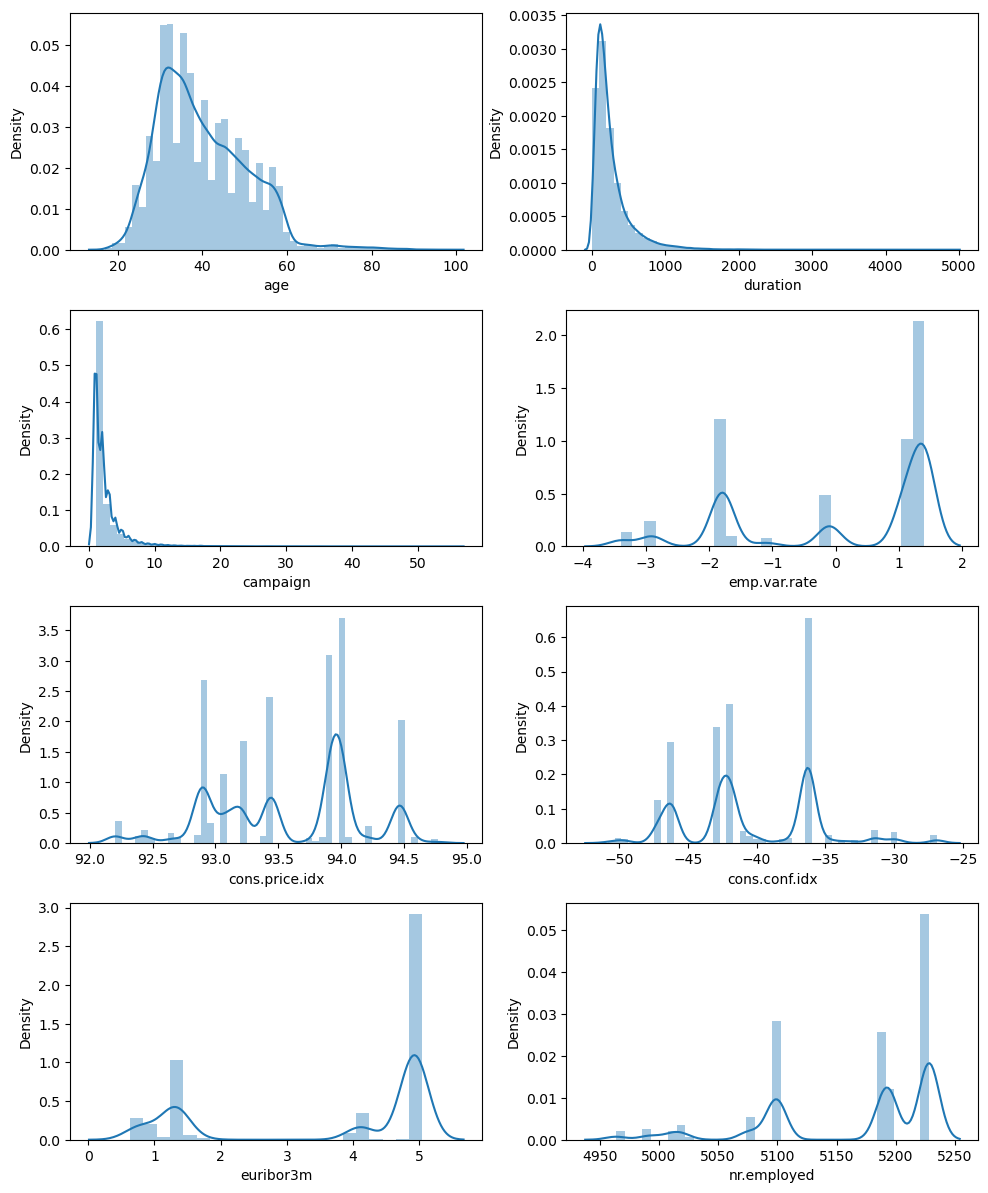

In [108]:
t=1
plt.figure(figsize=(10,12))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.distplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

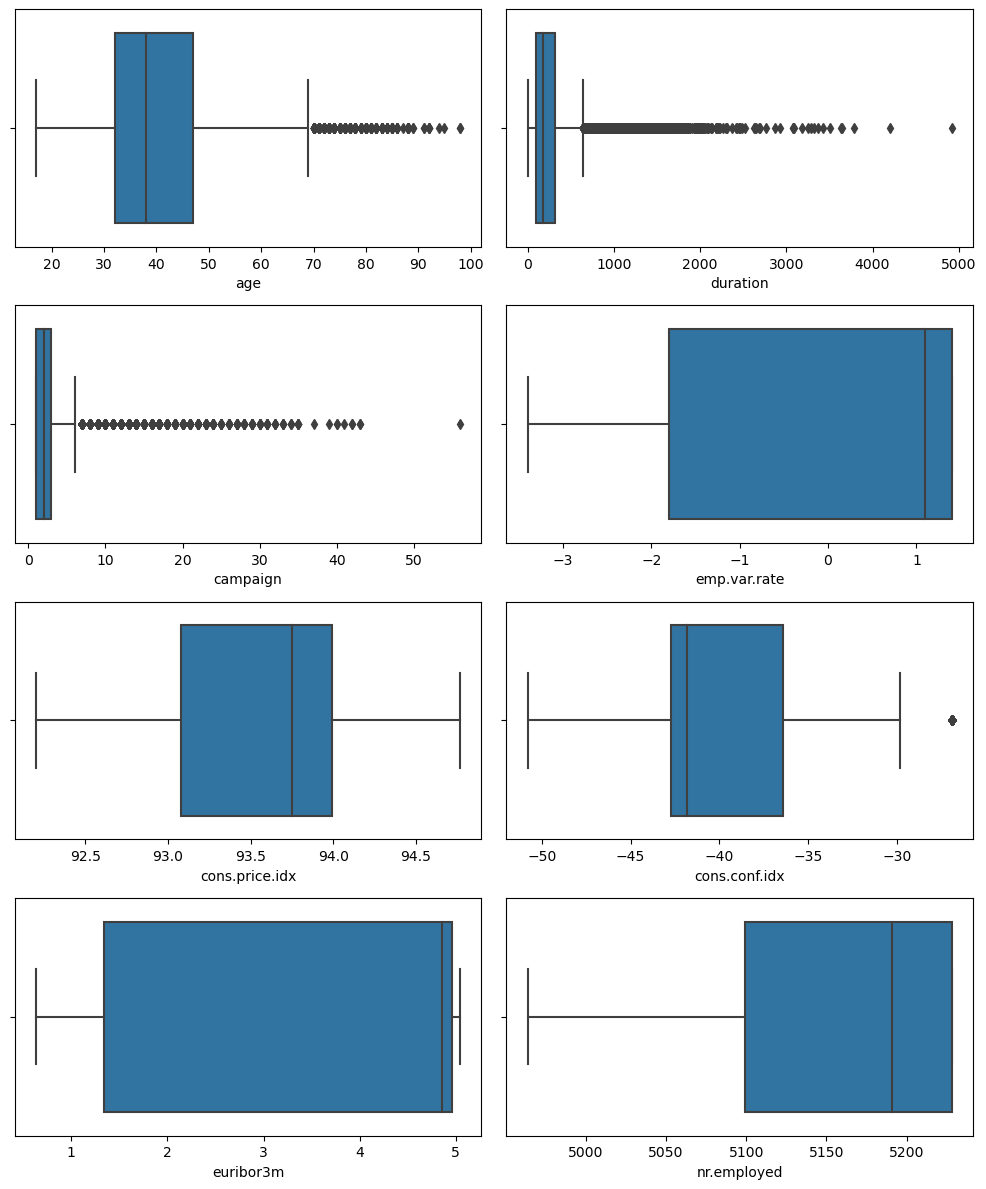

In [109]:
t=1
plt.figure(figsize=(10,12))
for i in num_cols:
    plt.subplot(4,2,t)
    sns.boxplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

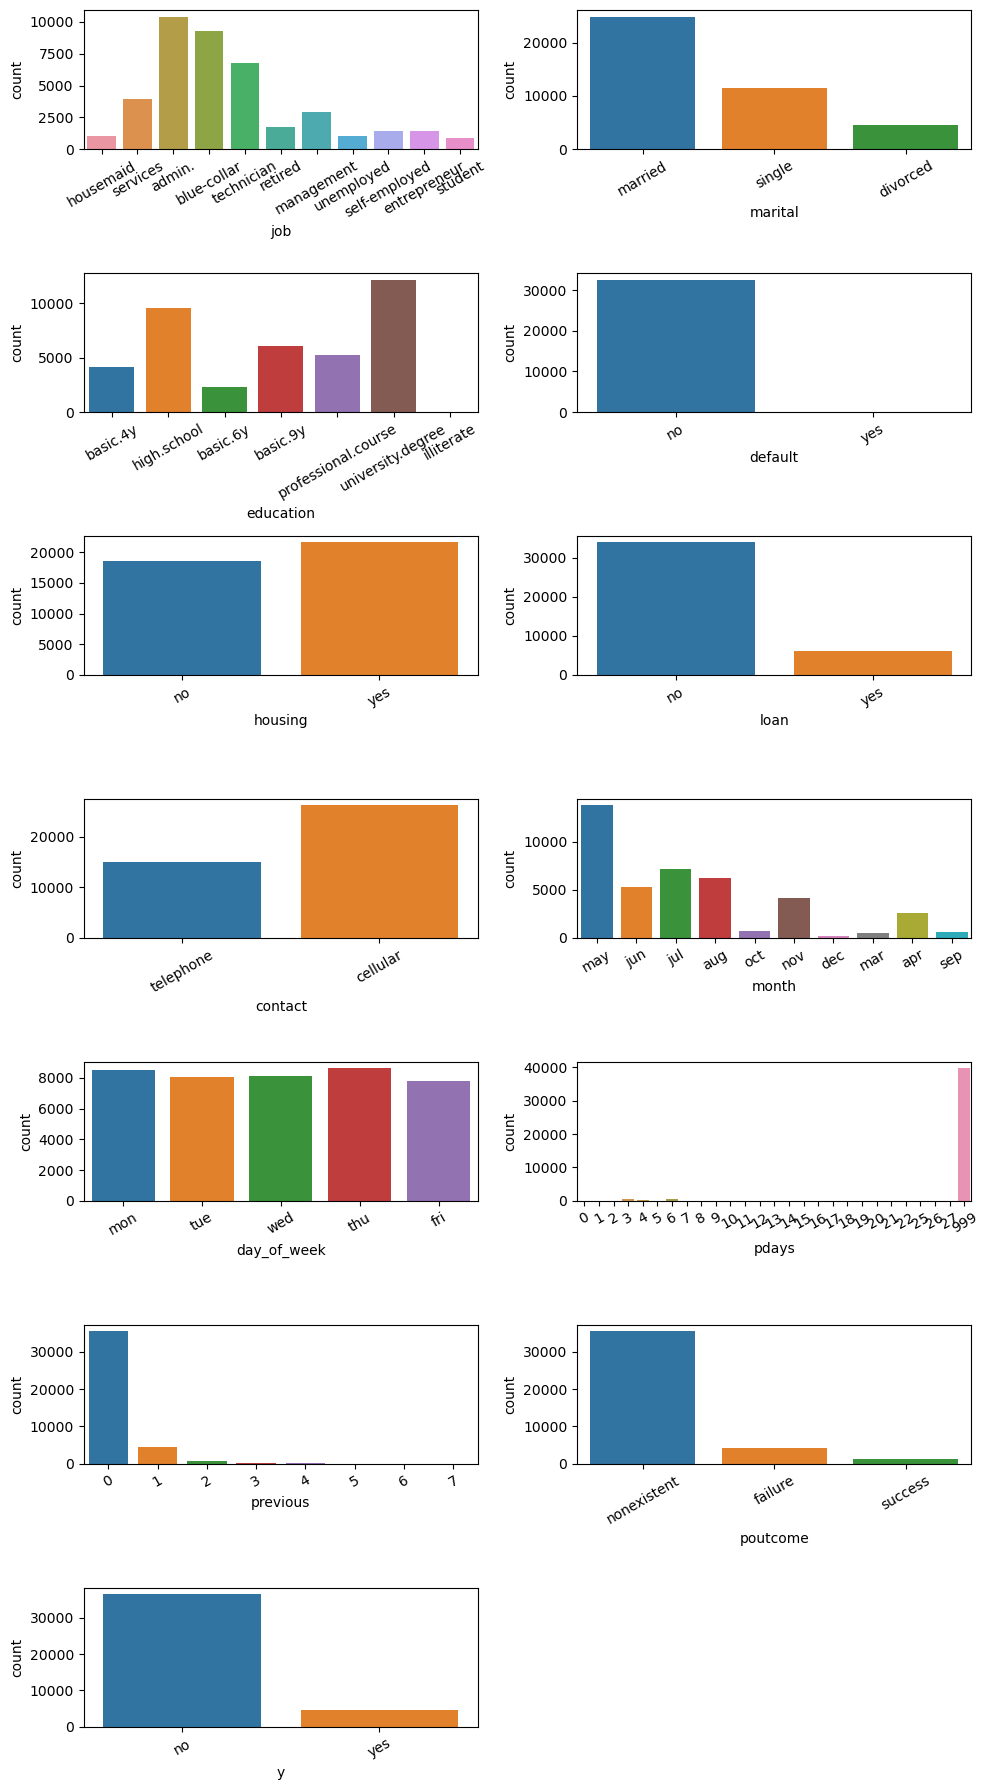

In [110]:
t=1
plt.figure(figsize=(10,18))
for i in cat_cols:
    plt.subplot(7,2,t)
    sns.countplot(data[i])
    plt.xticks(rotation=30)
    t+=1
plt.tight_layout()
plt.show()

## Correct the features in the dataset

In [111]:
data['pdays'] = np.where(data['pdays']==999,0,1)

In [112]:
data['previous'] = np.where(data['previous']==0,0,1)

In [113]:
data.drop(columns=['duration'],inplace=True)

In [114]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## Missing values Treatment

In [115]:
data.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [116]:
data[data['marital'].isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
40,58,management,NaN,university.degree,no,yes,no,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
390,59,retired,NaN,university.degree,NaN,no,no,telephone,may,tue,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
413,57,retired,NaN,basic.4y,no,no,no,telephone,may,tue,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1493,33,services,NaN,high.school,no,yes,yes,telephone,may,thu,2,0,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
1608,32,NaN,NaN,university.degree,no,no,no,telephone,may,fri,4,0,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38550,31,entrepreneur,NaN,university.degree,no,no,no,cellular,oct,thu,1,0,0,nonexistent,-3.4,92.431,-26.9,0.722,5017.5,yes
38579,31,entrepreneur,NaN,university.degree,no,yes,no,telephone,oct,thu,4,0,1,failure,-3.4,92.431,-26.9,0.722,5017.5,no
39322,30,technician,NaN,university.degree,no,no,no,cellular,mar,mon,2,1,1,success,-1.8,93.369,-34.8,0.639,5008.7,yes
39323,30,technician,NaN,university.degree,no,no,no,cellular,mar,mon,2,1,1,success,-1.8,93.369,-34.8,0.639,5008.7,yes


In [117]:
data.groupby(by='marital')['age'].mean()

marital
divorced    44.899393
married     42.307165
single      33.158714
Name: age, dtype: float64

In [118]:
data[data.age<=30]['marital'].mode()

0    single
Name: marital, dtype: object

In [119]:
data[(data.age>30)&(data.age<=60)]['marital'].mode()

0    married
Name: marital, dtype: object

In [120]:
data[(data.age>60)]['marital'].mode()

0    married
Name: marital, dtype: object

In [121]:
data['marital'] = np.where((data['marital'].isnull())&(data['age']<=30),'single',data['marital'])

In [122]:
data['marital'] = np.where((data['marital'].isnull())&(data['age']>30),'married',data['marital'])

<AxesSubplot:xlabel='marital', ylabel='count'>

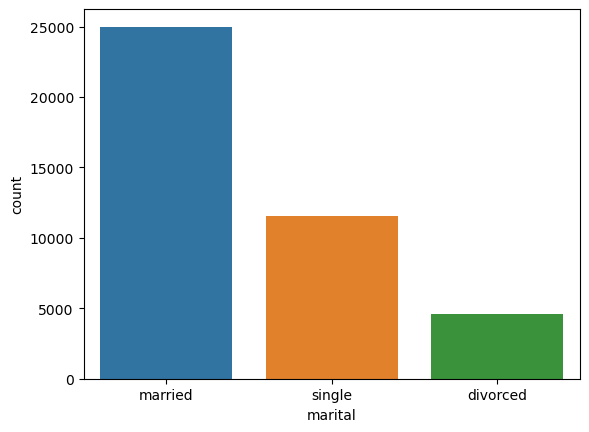

In [123]:
sns.countplot(data['marital'])

In [124]:
drop_ind = data[data.job.isnull()&data.education.isnull()].index

In [125]:
data.drop(index=drop_ind,inplace=True)

In [126]:
uniq_jobs = data[data.education.isnull()]['job'].unique()

In [127]:
for i in uniq_jobs:
    mod = data[data.job==i]['education'].mode()[0]
    data['education'] = np.where((data.education.isnull())&(data.job==i),mod,data['education'])

In [128]:
data[data.education.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


<AxesSubplot:xlabel='education', ylabel='count'>

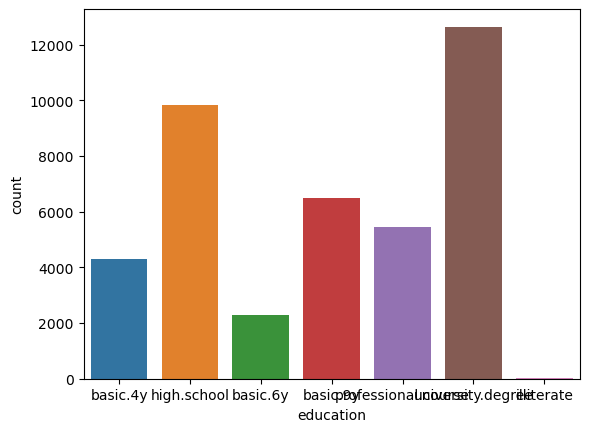

In [129]:
sns.countplot(data['education'])

In [130]:
uniq_edu = data[data.job.isnull()]['education'].unique()

In [131]:
uniq_edu

array(['university.degree', 'basic.4y', 'high.school', 'basic.9y',
       'basic.6y', 'professional.course'], dtype=object)

In [132]:
for i in uniq_edu:
    mod = data[data.education==i]['job'].mode()[0]
    data['job'] = np.where((data.job.isnull())&(data.education==i),mod,data['job'])

In [133]:
data[data.job.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [134]:
data.isnull().sum()

age                  0
job                  0
marital              0
education            0
default           8523
housing            988
loan               988
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [135]:
data[data.housing.isnull()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29,55,admin.,married,university.degree,NaN,NaN,NaN,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
81,51,blue-collar,married,basic.4y,NaN,NaN,NaN,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
261,27,blue-collar,single,basic.6y,no,NaN,NaN,telephone,may,mon,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
385,59,management,married,basic.4y,NaN,NaN,NaN,telephone,may,tue,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
401,48,services,married,high.school,NaN,NaN,NaN,telephone,may,tue,1,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40990,31,admin.,single,university.degree,no,NaN,NaN,cellular,oct,tue,1,1,1,success,-1.1,94.601,-49.5,1.008,4963.6,yes
41014,31,technician,single,professional.course,no,NaN,NaN,cellular,oct,thu,2,0,0,nonexistent,-1.1,94.601,-49.5,1.025,4963.6,yes
41015,34,admin.,divorced,university.degree,no,NaN,NaN,cellular,oct,thu,2,0,1,failure,-1.1,94.601,-49.5,1.025,4963.6,no
41029,46,management,married,university.degree,no,NaN,NaN,cellular,oct,mon,2,1,1,failure,-1.1,94.601,-49.5,1.032,4963.6,no


In [136]:
data.drop(index=data[data.loan.isnull()].index,inplace=True)

In [137]:
data.isnull().sum()

age                  0
job                  0
marital              0
education            0
default           8298
housing              0
loan                 0
contact              0
month                0
day_of_week          0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [138]:
# Lets create unknown be the third category in default
data['default'] = np.where(data['default'].isnull(),'Unknown',data['default'])

In [139]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [140]:
data.shape

(40069, 20)

### Outlier Treatment

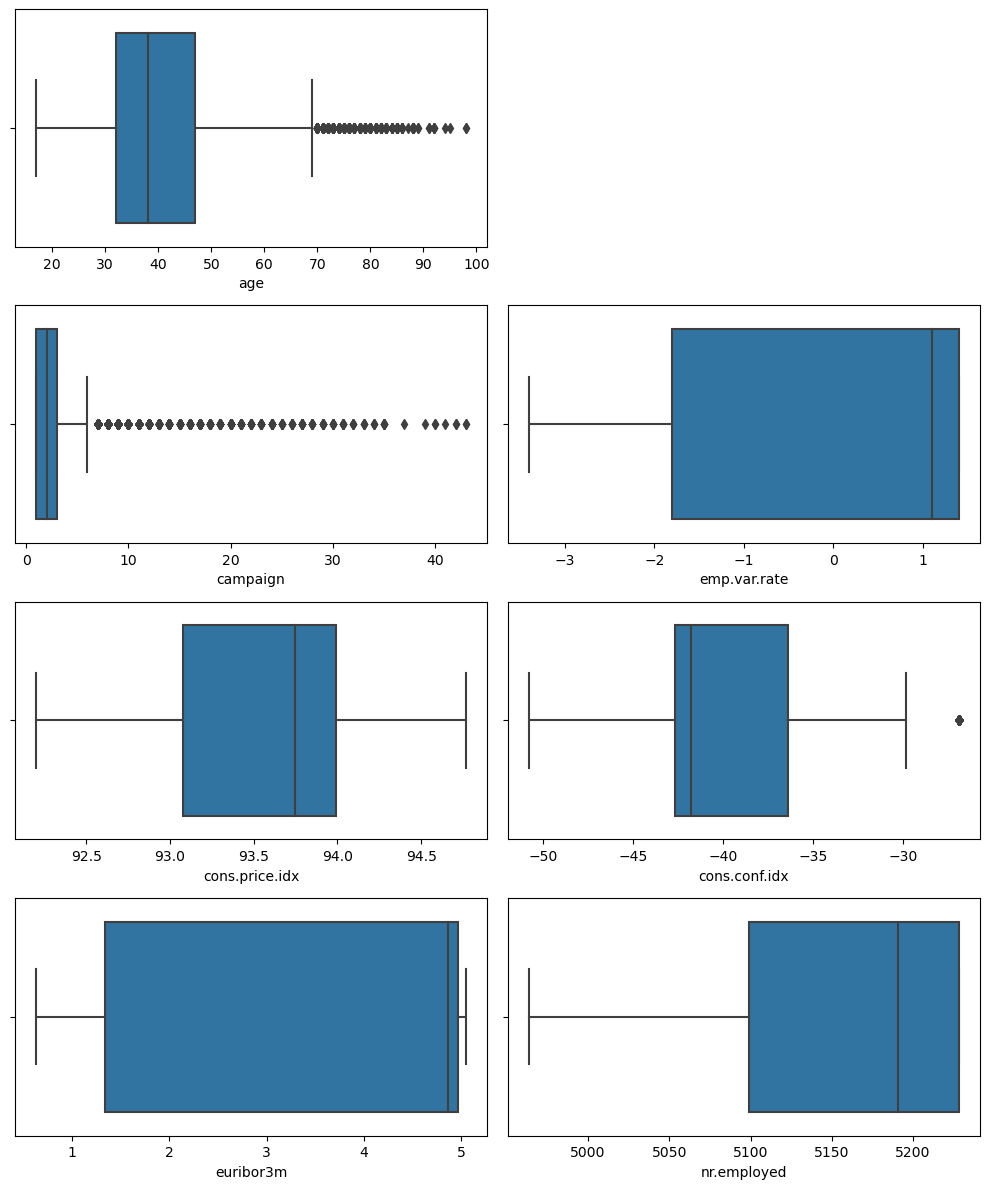

In [141]:
t=1
plt.figure(figsize=(10,12))
for i in num_cols:
    if i != 'duration':
        plt.subplot(4,2,t)
        sns.boxplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

In [142]:
q1,q3 = np.quantile(data['campaign'],[0.25,0.75])
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
data['campaign']= np.where(data['campaign']>ul,ul,data['campaign'])
data['campaign']= np.where(data['campaign']<ll,ll,data['campaign'])

In [143]:
ul

6.0

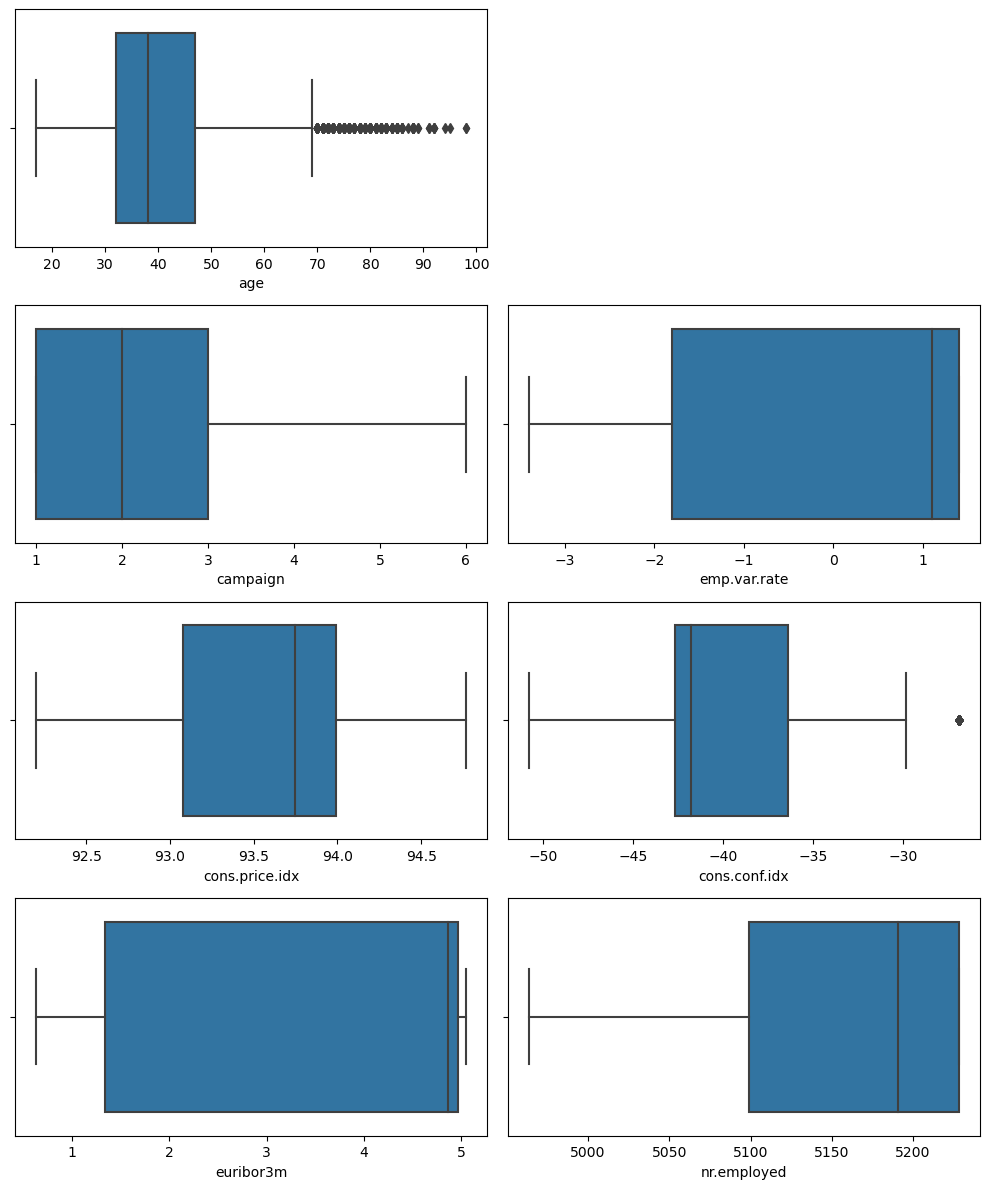

In [144]:
t=1
plt.figure(figsize=(10,12))
for i in num_cols:
    if i != 'duration':
        plt.subplot(4,2,t)
        sns.boxplot(data[i])
    t+=1
plt.tight_layout()
plt.show()

## Ecoding

In [145]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,Unknown,no,no,telephone,may,mon,1.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1.0,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1.0,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2.0,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1.0,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [146]:
data['campaign'].value_counts()

1.0    17165
2.0    10284
3.0     5192
6.0     3285
4.0     2575
5.0     1568
Name: campaign, dtype: int64

In [147]:
# Frequency encoding on job
map_data = data.job.value_counts(normalize=True).to_dict()
data.job = data.job.map(map_data)

In [148]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.025731,married,basic.4y,no,no,no,telephone,may,mon,1.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,0.096533,married,high.school,Unknown,no,no,telephone,may,mon,1.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,0.096533,married,high.school,no,yes,no,telephone,may,mon,1.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0.256433,married,basic.6y,no,no,no,telephone,may,mon,1.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,0.096533,married,high.school,no,no,yes,telephone,may,mon,1.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0.041828,married,professional.course,no,yes,no,cellular,nov,fri,1.0,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,0.227557,married,professional.course,no,no,no,cellular,nov,fri,1.0,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,0.041828,married,university.degree,no,yes,no,cellular,nov,fri,2.0,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,0.164916,married,professional.course,no,no,no,cellular,nov,fri,1.0,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [149]:
data.marital.value_counts()

married     24295
single      11288
divorced     4486
Name: marital, dtype: int64

In [150]:
map_data = data.month.value_counts(normalize=True).to_dict()
data.month = data.month.map(map_data)

In [151]:
map_data = data.day_of_week.value_counts(normalize=True).to_dict()
data.day_of_week= data.day_of_week.map(map_data)

In [152]:
data.education.value_counts()

university.degree      12360
high.school             9605
basic.9y                6337
professional.course     5323
basic.4y                4194
basic.6y                2232
illiterate                18
Name: education, dtype: int64

In [153]:
def education(val):
    if val=='illiterate':
        return 0
    elif val in ['basic.4y','basic.6y','basic.9y']:
        return 1
    elif val=='high.school':
        return 2
    elif val=='professional.course':
        return 3
    else:
        return 4
    

In [154]:
data['education'] = data['education'].apply(education)

In [155]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,0.025731,married,1,no,no,no,telephone,0.333974,0.206893,1.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,0.096533,married,2,Unknown,no,no,telephone,0.333974,0.206893,1.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,0.096533,married,2,no,yes,no,telephone,0.333974,0.206893,1.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,0.256433,married,1,no,no,no,telephone,0.333974,0.206893,1.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,0.096533,married,2,no,no,yes,telephone,0.333974,0.206893,1.0,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0.041828,married,3,no,yes,no,cellular,0.100352,0.189773,1.0,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,0.227557,married,3,no,no,no,cellular,0.100352,0.189773,1.0,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,0.041828,married,4,no,yes,no,cellular,0.100352,0.189773,2.0,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,0.164916,married,3,no,no,no,cellular,0.100352,0.189773,1.0,0,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [156]:
data = pd.get_dummies(data)

In [157]:
le = LabelEncoder()

In [158]:
data['nr.employed'] = le.fit_transform(data['nr.employed'])

In [159]:
data.drop(columns=['marital_married','default_no','housing_no','loan_no','contact_telephone',
                  'poutcome_nonexistent','y_no'],inplace=True)

## Check for multicolinearity

<AxesSubplot:>

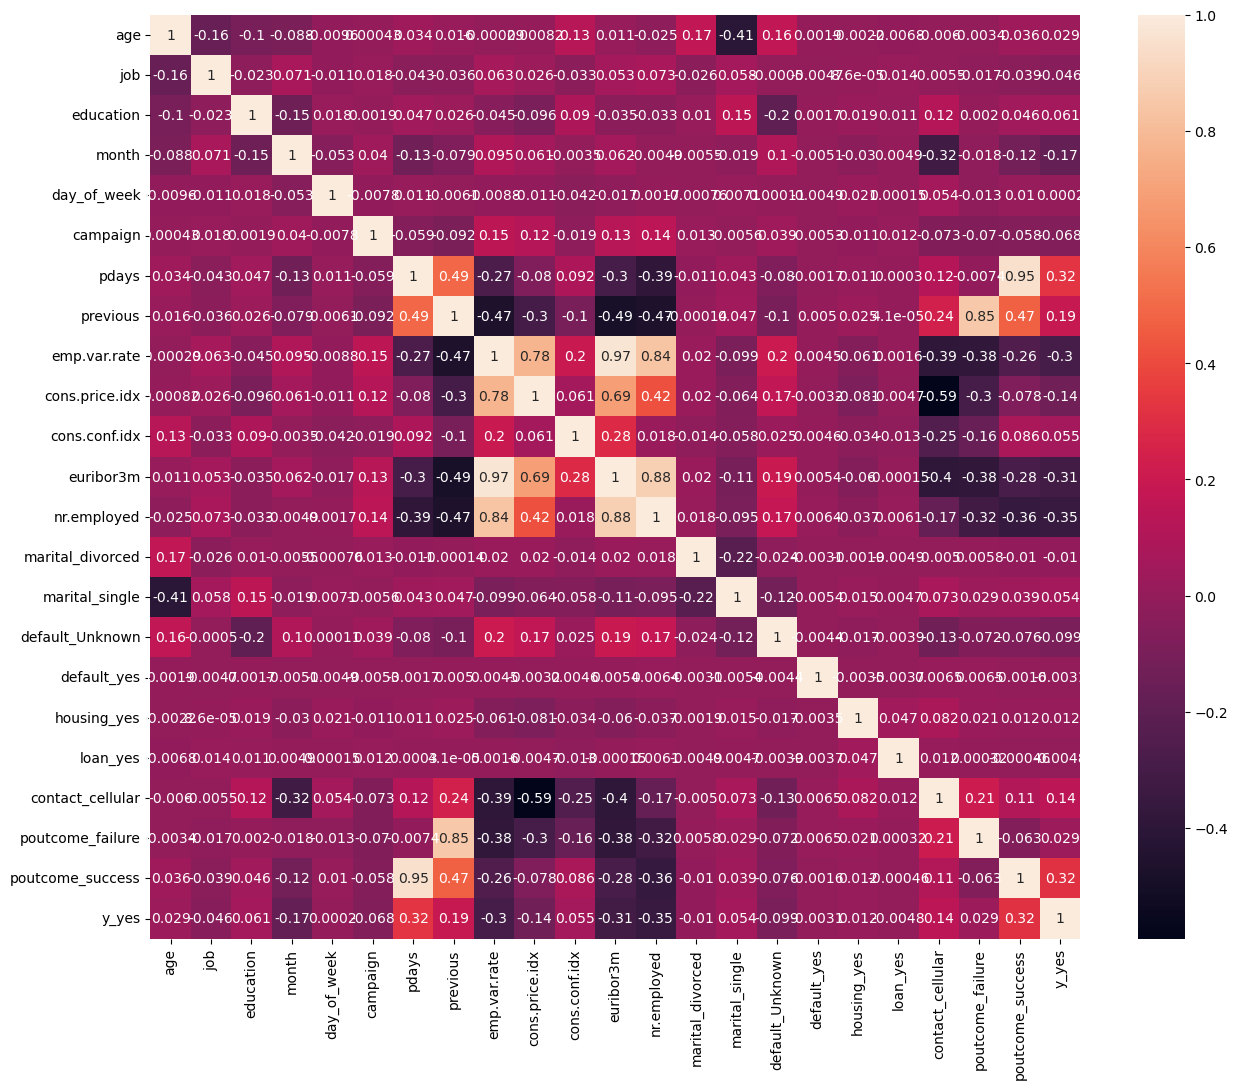

In [160]:
plt.figure(figsize=(15,12))
sns.heatmap(data.corr(),annot=True)

## Train test split

In [161]:
x = data.drop(columns=['y_yes'])
y = data['y_yes']

In [162]:
x

,age,job,education,month,day_of_week,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,marital_divorced,marital_single,default_Unknown,default_yes,housing_yes,loan_yes,contact_cellular,poutcome_failure,poutcome_success
0,56,0.025731,1,0.333974,0.206893,1.0,0,0,1.1,93.994,-36.4,4.857,8,0,0,0,0,0,0,0,0,0
1,57,0.096533,2,0.333974,0.206893,1.0,0,0,1.1,93.994,-36.4,4.857,8,0,0,1,0,0,0,0,0,0
2,37,0.096533,2,0.333974,0.206893,1.0,0,0,1.1,93.994,-36.4,4.857,8,0,0,0,0,1,0,0,0,0
3,40,0.256433,1,0.333974,0.206893,1.0,0,0,1.1,93.994,-36.4,4.857,8,0,0,0,0,0,0,0,0,0
4,56,0.096533,2,0.333974,0.206893,1.0,0,0,1.1,93.994,-36.4,4.857,8,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0.041828,3,0.100352,0.189773,1.0,0,0,-1.1,94.767,-50.8,1.028,0,0,0,0,0,1,0,1,0,0
41184,46,0.227557,3,0.100352,0.189773,1.0,0,0,-1.1,94.767,-50.8,1.028,0,0,0,0,0,0,0,1,0,0
41185,56,0.041828,4,0.100352,0.189773,2.0,0,0,-1.1,94.767,-50.8,1.028,0,0,0,0,0,1,0,1,0,0
41186,44,0.164916,3,0.100352,0.189773,1.0,0,0,-1.1,94.767,-50.8,1.028,0,0,0,0,0,0,0,1,0,0


In [163]:
x['Socio_Economic_number'] = x.iloc[:,8:13].sum(axis=1)/4

In [164]:
x.drop(columns=x.iloc[:,8:12].columns,inplace=True)

In [165]:
x

,age,job,education,month,day_of_week,campaign,pdays,previous,nr.employed,marital_divorced,marital_single,default_Unknown,default_yes,housing_yes,loan_yes,contact_cellular,poutcome_failure,poutcome_success,Socio_Economic_number
0,56,0.025731,1,0.333974,0.206893,1.0,0,0,8,0,0,0,0,0,0,0,0,0,17.88775
1,57,0.096533,2,0.333974,0.206893,1.0,0,0,8,0,0,1,0,0,0,0,0,0,17.88775
2,37,0.096533,2,0.333974,0.206893,1.0,0,0,8,0,0,0,0,1,0,0,0,0,17.88775
3,40,0.256433,1,0.333974,0.206893,1.0,0,0,8,0,0,0,0,0,0,0,0,0,17.88775
4,56,0.096533,2,0.333974,0.206893,1.0,0,0,8,0,0,0,0,0,1,0,0,0,17.88775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,0.041828,3,0.100352,0.189773,1.0,0,0,0,0,0,0,0,1,0,1,0,0,10.97375
41184,46,0.227557,3,0.100352,0.189773,1.0,0,0,0,0,0,0,0,0,0,1,0,0,10.97375
41185,56,0.041828,4,0.100352,0.189773,2.0,0,0,0,0,0,0,0,1,0,1,0,0,10.97375
41186,44,0.164916,3,0.100352,0.189773,1.0,0,0,0,0,0,0,0,0,0,1,0,0,10.97375


In [166]:
x.drop(columns=['previous','day_of_week','nr.employed','pdays'],inplace=True)

In [167]:
vif = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]

In [168]:
pd.DataFrame({'VIF':vif[:]},index=x.columns).sort_values(by='VIF',ascending=False)

,VIF
Socio_Economic_number,29.733420
age,17.349786
education,5.325981
job,4.728255
month,4.689685
campaign,3.184949
contact_cellular,3.086635
housing_yes,2.156628
marital_single,1.685876
default_Unknown,1.390535


<AxesSubplot:>

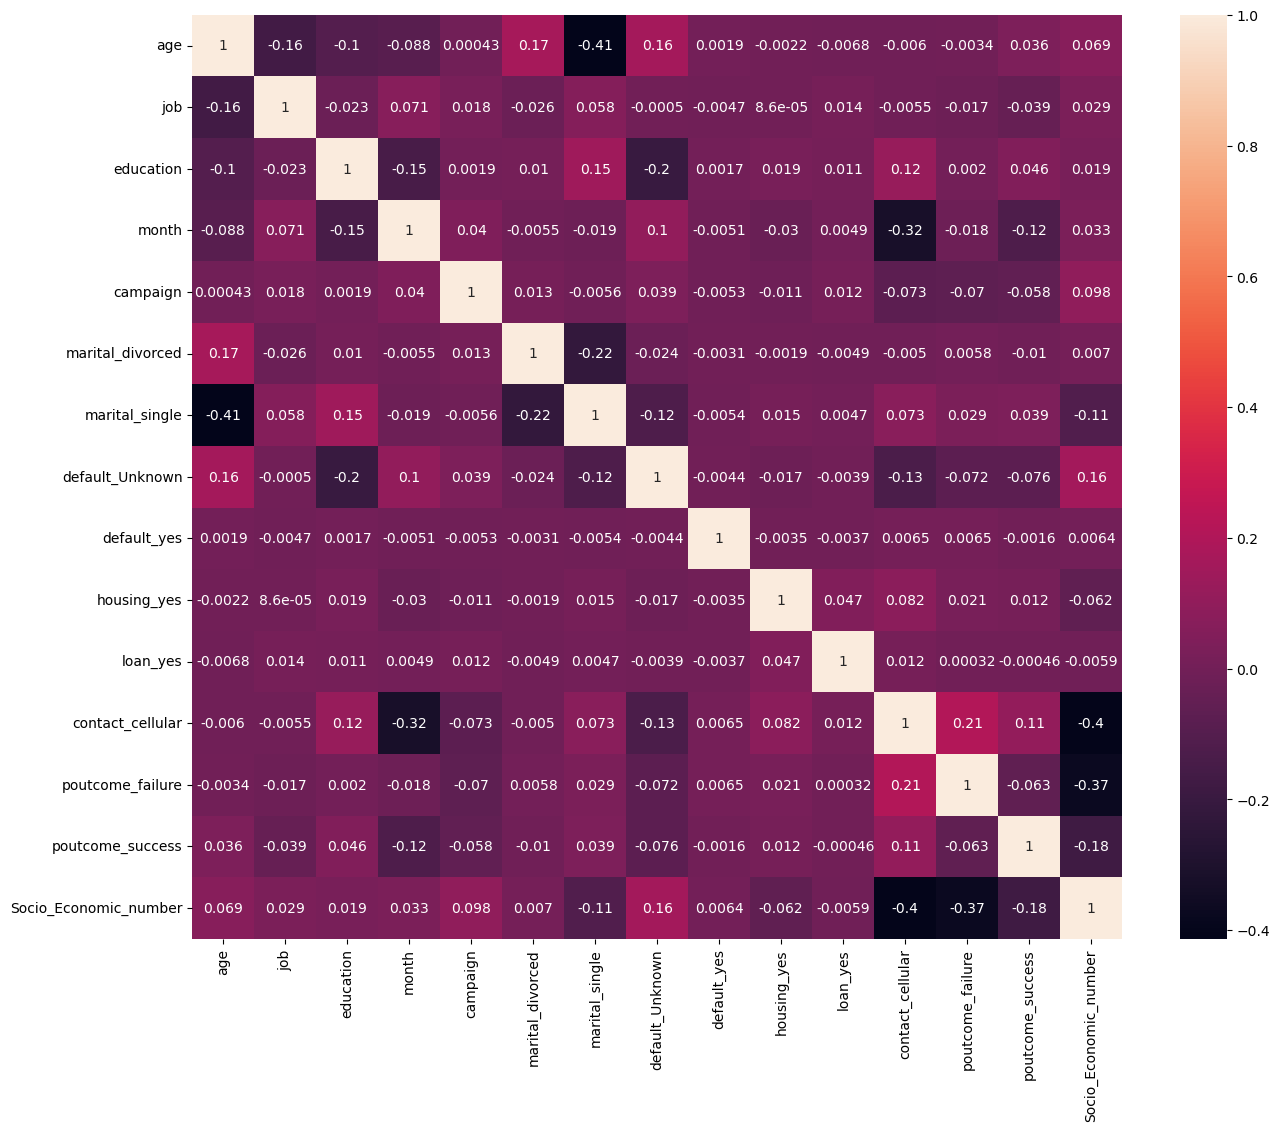

In [169]:
plt.figure(figsize=(15,12))
sns.heatmap(x.corr(),annot=True)

In [170]:
x_train,x_test,y_train,y_test = train_test_split(x,y,stratify=y,train_size=0.8,random_state=2)

In [171]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((32055, 15), (8014, 15), (32055,), (8014,))

In [172]:
for i in ['Socio_Economic_number','age']:
    sc = StandardScaler()
    x_train[i] = sc.fit_transform(pd.DataFrame(x_train[i]))
    x_test[i] = sc.transform(pd.DataFrame(x_test[i]))
    

In [173]:
x_train

,age,job,education,month,campaign,marital_divorced,marital_single,default_Unknown,default_yes,housing_yes,loan_yes,contact_cellular,poutcome_failure,poutcome_success,Socio_Economic_number
31743,0.281572,0.096533,2,0.333974,2.0,0,0,0,0,0,0,1,1,0,-1.543293
40593,-0.773337,0.256433,4,0.013701,1.0,0,1,0,0,0,0,1,0,0,-1.012005
10308,-0.773337,0.227557,2,0.127805,1.0,0,0,0,0,0,1,0,0,0,0.551073
14893,-1.828246,0.096533,2,0.174798,1.0,0,1,0,0,1,0,0,0,0,0.370363
11300,1.432383,0.025731,1,0.127805,4.0,0,0,1,0,1,0,0,0,0,0.551197
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15642,-0.006130,0.071202,4,0.174798,3.0,0,0,0,0,1,0,1,0,0,0.370737
5898,0.281572,0.256433,2,0.333974,2.0,0,0,1,0,1,1,0,0,0,0.865882
4894,-0.965139,0.071202,4,0.333974,1.0,0,1,0,0,1,0,0,0,0,0.866007
14485,-0.581535,0.096533,2,0.174798,3.0,1,0,0,0,1,0,1,0,0,0.370861


##  Base Model

In [174]:
x_train_c = sm.add_constant(x_train)
x_test_c = sm.add_constant(x_test)

In [175]:
model = sm.Logit(y_train,x_train_c).fit()

         Current function value: inf
         Iterations: 35


In [176]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                32055
Model:                          Logit   Df Residuals:                    32039
Method:                           MLE   Df Model:                           15
Date:                Sun, 04 Jun 2023   Pseudo R-squ.:                     inf
Time:                        01:48:57   Log-Likelihood:                   -inf
converged:                      False   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.6712      0.087    -19.227      0.000      -1.842      -1.501
age                       0.1166      0.020      5.852      0.000       0.078       0.156
job     

In [177]:
y_pred_prob = model.predict(x_test_c)

In [178]:
y_pred_prob

27427    0.156601
759      0.014964
35962    0.093431
34177    0.080379
15445    0.120055
           ...   
34365    0.133609
36852    0.206724
18580    0.071096
6304     0.024667
26885    0.077881
Length: 8014, dtype: float64

In [179]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [180]:
def validation(test,pred):
    print('Confusion Matrix\n',confusion_matrix(test,pred))
    print('Accuracy',accuracy_score(test,pred))
    print('Precison',precision_score(test,pred))
    print('Recall',recall_score(test,pred))
    print('F1 Score',f1_score(test,pred))
    print('Cohen kappa Score',cohen_kappa_score(test,pred))
    print('Classification Report\n',classification_report(test,pred))

In [181]:
validation(y_test,y_pred)

Confusion Matrix
 [[7048   63]
 [ 740  163]]
Accuracy 0.89980034938857
Precison 0.7212389380530974
Recall 0.1805094130675526
F1 Score 0.2887511071744907
Cohen kappa Score 0.25515015075842196
Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.95      7111
           1       0.72      0.18      0.29       903

    accuracy                           0.90      8014
   macro avg       0.81      0.59      0.62      8014
weighted avg       0.88      0.90      0.87      8014



In [182]:
def roc_curv(test,pred):
    fpr,tpr,thres=roc_curve(test,pred)
    print('AUC:',roc_auc_score(test,pred))
    plt.plot(fpr,tpr,color='red')
    plt.plot([0, 1], [0, 1],'b--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('ROC CURVE')

AUC: 0.7622065730989671


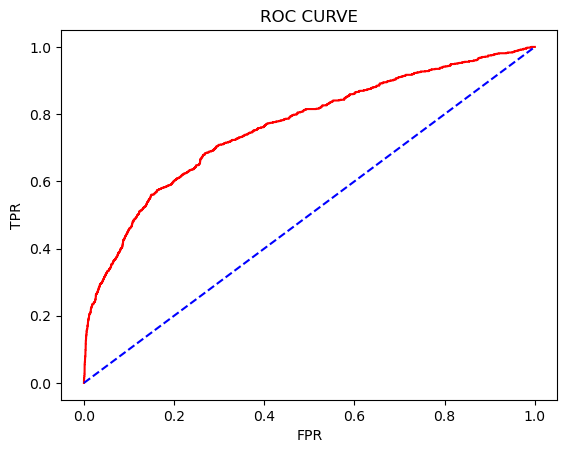

In [183]:
roc_curv(y_test,y_pred_prob)

## Base Model (Balanced Data)

In [184]:
y_train.value_counts()

0    28442
1     3613
Name: y_yes, dtype: int64

In [185]:
adasyn = ADASYN(sampling_strategy=0.3)

In [186]:
x_train_bal,y_train_bal = adasyn.fit_resample(x_train,y_train)

In [187]:
y_train_bal.value_counts()

0    28442
1     8306
Name: y_yes, dtype: int64

In [188]:
x_train_bal.shape

(36748, 15)

In [189]:
x_train_c = sm.add_constant(x_train_bal)
x_test_c = sm.add_constant(x_test)

In [190]:
model = sm.Logit(y_train_bal,x_train_c).fit()

Optimization terminated successfully.
         Current function value: inf
         Iterations 25


In [191]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  y_yes   No. Observations:                36748
Model:                          Logit   Df Residuals:                    36732
Method:                           MLE   Df Model:                           15
Date:                Sun, 04 Jun 2023   Pseudo R-squ.:                     inf
Time:                        01:49:02   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.4413      0.061     -7.237      0.000      -0.561      -0.322
age                       0.0809      0.015      5.562      0.000       0.052       0.109
job     

In [192]:
y_pred_prob = model.predict(x_test_c)

In [193]:
y_pred = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

In [194]:
validation(y_test,y_pred)

Confusion Matrix
 [[6780  331]
 [ 627  276]]
Accuracy 0.880459196406289
Precison 0.4546952224052718
Recall 0.30564784053156147
F1 Score 0.3655629139072848
Cohen kappa Score 0.30236409278850196
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.95      0.93      7111
           1       0.45      0.31      0.37       903

    accuracy                           0.88      8014
   macro avg       0.69      0.63      0.65      8014
weighted avg       0.86      0.88      0.87      8014



AUC: 0.7576571353196496


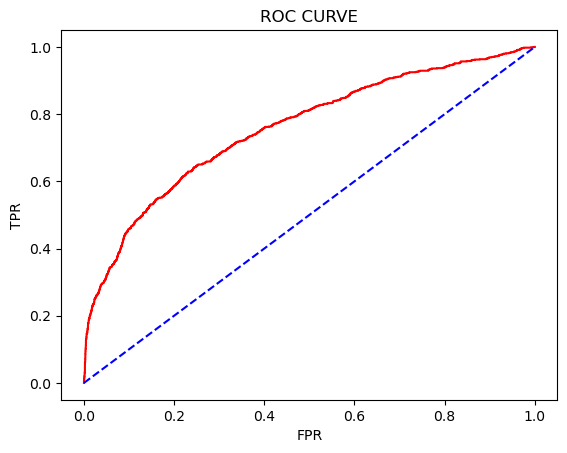

In [195]:
roc_curv(y_test,y_pred_prob)

## Lets try with some other algorithm

In [196]:
def model_results(model,x_train,y_train,x_test,y_test):
    print(str(model))

    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
   
    validation(y_test,y_pred)
    
    y_pred_prob = model.predict_proba(x_test)[:,1]
    
    roc_curv(y_test,y_pred_prob)

## KNN

KNeighborsClassifier(n_neighbors=7)
Confusion Matrix
 [[6471  640]
 [ 579  324]]
Accuracy 0.8478911904167706
Precison 0.3360995850622407
Recall 0.3588039867109635
F1 Score 0.34708087841456886
Cohen kappa Score 0.26110338023443336
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      7111
           1       0.34      0.36      0.35       903

    accuracy                           0.85      8014
   macro avg       0.63      0.63      0.63      8014
weighted avg       0.85      0.85      0.85      8014

AUC: 0.7024439854464088


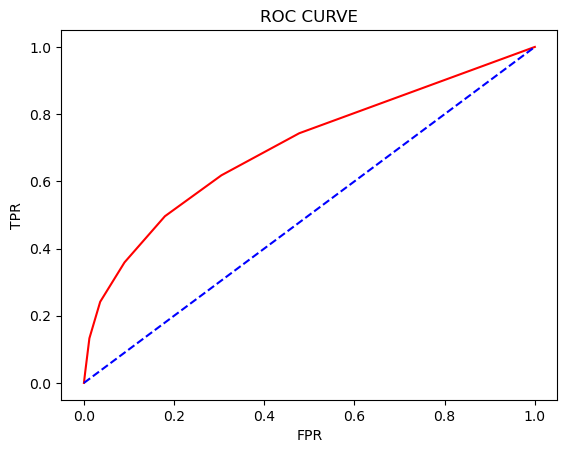

In [197]:
model_results(KNeighborsClassifier(n_neighbors=7),x_train_bal,y_train_bal,x_test,y_test)

## Naive Bayes

GaussianNB()
Confusion Matrix
 [[1854 5257]
 [  82  821]]
Accuracy 0.33379086598452706
Precison 0.13507732806844358
Recall 0.9091915836101883
F1 Score 0.23520985532158717
Cohen kappa Score 0.04852512847444279
Classification Report
               precision    recall  f1-score   support

           0       0.96      0.26      0.41      7111
           1       0.14      0.91      0.24       903

    accuracy                           0.33      8014
   macro avg       0.55      0.58      0.32      8014
weighted avg       0.86      0.33      0.39      8014

AUC: 0.7600176632743275


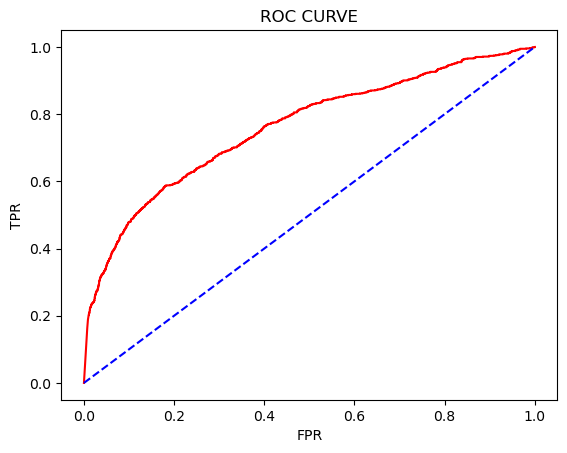

In [198]:
model_results(GaussianNB(),x_train_bal,y_train_bal,x_test,y_test)

DecisionTreeClassifier(max_depth=7)
Confusion Matrix
 [[6639  472]
 [ 493  410]]
Accuracy 0.8795857249812827
Precison 0.46485260770975056
Recall 0.4540420819490587
F1 Score 0.4593837535014006
Cohen kappa Score 0.39164172585831225
Classification Report
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7111
           1       0.46      0.45      0.46       903

    accuracy                           0.88      8014
   macro avg       0.70      0.69      0.70      8014
weighted avg       0.88      0.88      0.88      8014

AUC: 0.7775276181381364


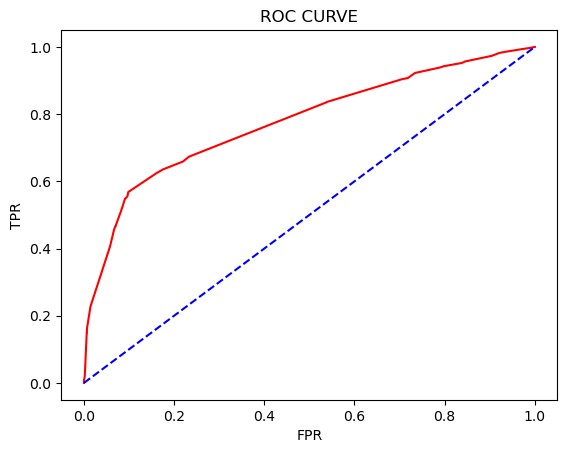

In [199]:
model_results(DecisionTreeClassifier(max_depth=7),x_train_bal,y_train_bal,x_test,y_test)

RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=200)
Confusion Matrix
 [[6962  149]
 [ 657  246]]
Accuracy 0.8994260044921387
Precison 0.6227848101265823
Recall 0.2724252491694352
F1 Score 0.3790446841294299
Cohen kappa Score 0.3333248011467258
Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      7111
           1       0.62      0.27      0.38       903

    accuracy                           0.90      8014
   macro avg       0.77      0.63      0.66      8014
weighted avg       0.88      0.90      0.88      8014

AUC: 0.7849037715965144


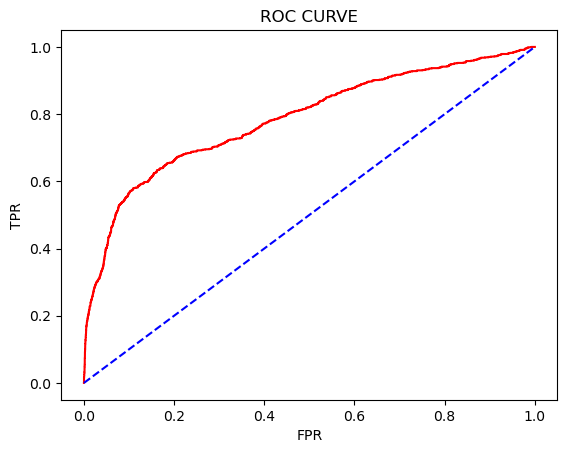

In [200]:
model_results(RandomForestClassifier(n_estimators=200,criterion='entropy',max_depth=7),x_train_bal,y_train_bal,x_test,y_test)

AdaBoostClassifier(learning_rate=0.2, n_estimators=500)
Confusion Matrix
 [[6799  312]
 [ 611  292]]
Accuracy 0.8848265535313202
Precison 0.48344370860927155
Recall 0.3233665559246955
F1 Score 0.3875248838752489
Cohen kappa Score 0.3267124049518517
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.96      0.94      7111
           1       0.48      0.32      0.39       903

    accuracy                           0.88      8014
   macro avg       0.70      0.64      0.66      8014
weighted avg       0.87      0.88      0.87      8014

AUC: 0.7792500287717329


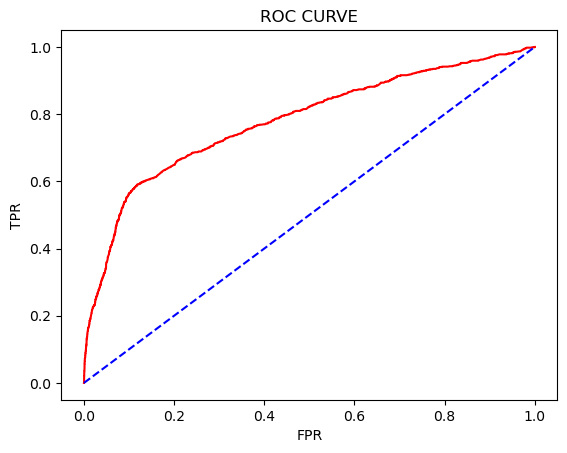

In [201]:
model_results(AdaBoostClassifier(n_estimators=500,learning_rate=0.2),x_train_bal,y_train_bal,x_test,y_test)

GradientBoostingClassifier(learning_rate=0.3, n_estimators=500)
Confusion Matrix
 [[6948  163]
 [ 635  268]]
Accuracy 0.9004242575492888
Precison 0.6218097447795824
Recall 0.2967884828349945
F1 Score 0.4017991004497751
Cohen kappa Score 0.3548239609615941
Classification Report
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      7111
           1       0.62      0.30      0.40       903

    accuracy                           0.90      8014
   macro avg       0.77      0.64      0.67      8014
weighted avg       0.88      0.90      0.88      8014

AUC: 0.7922522823887562


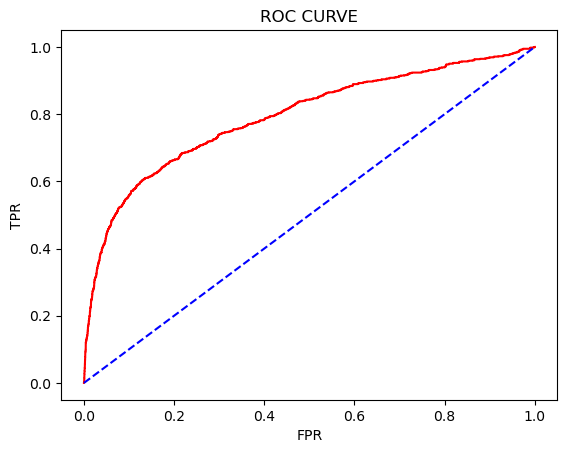

In [202]:
model_results(GradientBoostingClassifier(n_estimators=500,learning_rate=0.3),x_train_bal,y_train_bal,x_test,y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)
Confusion Matrix
 [[6904  207]
 [ 607  296]]
Accuracy 0.8984277514349888
Precison 0.588469184890656
Recall 0.327796234772979
F1 Score 0.42105263157894735
Cohen kappa Score 0.3702839564115836
Classification Report
               precision    recall 

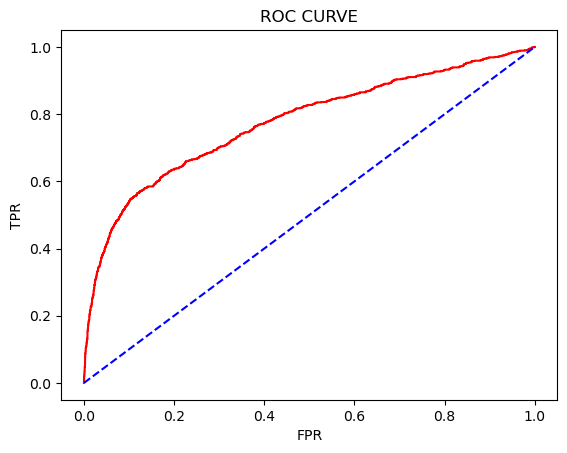

In [203]:
model_results(XGBClassifier(n_estimators=300),x_train_bal,y_train_bal,x_test,y_test)